In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
apt = pd.read_csv('./apartment_price.csv')
apt.head()

,apt_name,use_area,transaction_year_month,transaction_date,price,floor,year_of_completion,gu,dong,nursing_room_num,...,teacher_num,permission_year,commuting_vehicle_sum,day_care_num,park_area,one_park_area,citypark_area,one_citypark_area,walkpark_area,one_walkpark_area
0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,강남구,개포동,4.78,...,12.43,2007.0,20,180,7768.75,14.28,6479.09,11.91,3628.21,6.67
1,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,강남구,개포동,4.78,...,12.43,2007.0,20,180,7768.75,14.28,6479.09,11.91,3628.21,6.67
2,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,강남구,개포동,4.78,...,12.43,2007.0,20,180,7768.75,14.28,6479.09,11.91,3628.21,6.67
3,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,강남구,개포동,4.78,...,12.43,2007.0,20,180,7768.75,14.28,6479.09,11.91,3628.21,6.67
4,개포래미안포레스트,74.66,202109,16,253000,2,2020.0,강남구,개포동,4.78,...,12.43,2007.0,20,180,7768.75,14.28,6479.09,11.91,3628.21,6.67


# 1. train / test set 분리

In [4]:
train, test = train_test_split(apt, test_size=0.2, random_state = 7916, stratify = apt['gu'])

In [4]:
print(train.shape, test.shape)

(257362, 24) (64341, 24)


# 2. 데이터 훑어보기

In [5]:
train.keys()

Index(['apt_name', 'use_area', 'transaction_year_month', 'transaction_date',
       'price', 'floor', 'year_of_completion', 'gu', 'dong',
       'nursing_room_num', 'playground_num', 'CCTV_num', 'maximum_num',
       'current_num', 'teacher_num', 'permission_year',
       'commuting_vehicle_sum', 'day_care_num', 'park_area', 'one_park_area',
       'citypark_area', 'one_citypark_area', 'walkpark_area',
       'one_walkpark_area'],
      dtype='object')

    apt_name : 아파트 이름
    use_area : 아파트 전용면적
    transaction_year_month : 아파트 거래년월
    transaction_date : 아파트 거래날짜
    price : 아파트 실거래가
    floor : 아파트 층
    year_of_completion : 아파트 설립일자
    gu : 구
    dong : 동
    nursing_room_num : 어린이집 보육실 수
    playground_num : 어린이집 놀이터 수
    CCTV_num : 어린이집 cctv개수
    maximum_num : 어린이집 정원 
    current_num : 어린이집 현원
    teacher_num : 어린이집 교직원수
    permission_year : 어린이집 인가일자
    commuting_vehicle_sum : 어린이집 통학차량 운영 수
    day_care_num : 어린이집 수
    park_area : 공원 면적
    one_park_area : 1인당 공원 면적
    citypark_area : 도시공원 면적
    one_citypark_area : 1인당 도시공원 면적
    walkpark_area : 도보생활권공원 면적
    one_walkpark_area : 1인당 도보생활권공원 면적

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257362 entries, 272395 to 239295
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apt_name                257362 non-null  object 
 1   use_area                257362 non-null  float64
 2   transaction_year_month  257362 non-null  int64  
 3   transaction_date        257362 non-null  int64  
 4   price                   257362 non-null  int64  
 5   floor                   257362 non-null  int64  
 6   year_of_completion      257362 non-null  float64
 7   gu                      257362 non-null  object 
 8   dong                    257362 non-null  object 
 9   nursing_room_num        257362 non-null  float64
 10  playground_num          257362 non-null  float64
 11  CCTV_num                257362 non-null  float64
 12  maximum_num             257362 non-null  float64
 13  current_num             257362 non-null  float64
 14  teacher_num    

In [7]:
train.describe()

,use_area,transaction_year_month,transaction_date,price,floor,year_of_completion,nursing_room_num,playground_num,CCTV_num,maximum_num,...,teacher_num,permission_year,commuting_vehicle_sum,day_care_num,park_area,one_park_area,citypark_area,one_citypark_area,walkpark_area,one_walkpark_area
count,257362.000000,257362.000000,257362.000000,2.573620e+05,257362.000000,257362.000000,257362.000000,257362.000000,257362.000000,257362.000000,...,257362.000000,257362.000000,257362.000000,257362.000000,257362.000000,257362.000000,257362.000000,257362.000000,257362.000000,257362.000000
mean,77.343613,201925.913620,15.942874,8.081668e+04,9.144155,2000.495617,4.498379,0.705807,9.023983,47.146613,...,10.505240,2007.368800,30.991766,212.211177,7029.564914,16.564154,5093.859106,11.515105,2301.001570,5.344868
std,31.208235,126.970638,8.677253,5.965136e+04,6.181903,9.889986,0.395320,0.164656,1.985239,6.939033,...,1.323498,1.643524,14.979307,65.537746,4583.554933,11.617764,4387.608311,9.194096,1000.677968,2.454322
min,10.020000,201709.000000,1.000000,6.000000e+03,-3.000000,1961.000000,3.740000,0.520000,6.320000,34.610000,...,8.550000,2005.000000,2.000000,63.000000,1219.250000,3.420000,664.470000,1.630000,562.740000,2.270000
25%,59.630000,201807.000000,9.000000,4.380000e+04,4.000000,1994.000000,4.290000,0.560000,7.980000,43.410000,...,9.590000,2006.000000,19.000000,166.000000,3362.410000,7.390000,2369.580000,5.740000,1640.430000,3.570000
50%,82.680000,201910.000000,16.000000,6.500000e+04,8.000000,2001.000000,4.520000,0.660000,8.660000,46.840000,...,10.630000,2007.000000,32.000000,207.000000,4771.420000,11.960000,3319.700000,8.520000,2099.860000,4.550000
75%,84.970000,202008.000000,23.000000,9.700000e+04,13.000000,2007.000000,4.780000,0.830000,9.210000,51.150000,...,11.130000,2009.000000,37.000000,261.000000,10160.380000,27.970000,6479.090000,13.630000,2957.420000,6.470000
max,395.060000,202209.000000,31.000000,1.350000e+06,69.000000,2022.000000,5.320000,1.160000,14.950000,64.590000,...,14.810000,2010.000000,59.000000,330.000000,15072.560000,71.720000,14406.710000,39.500000,4357.260000,19.020000


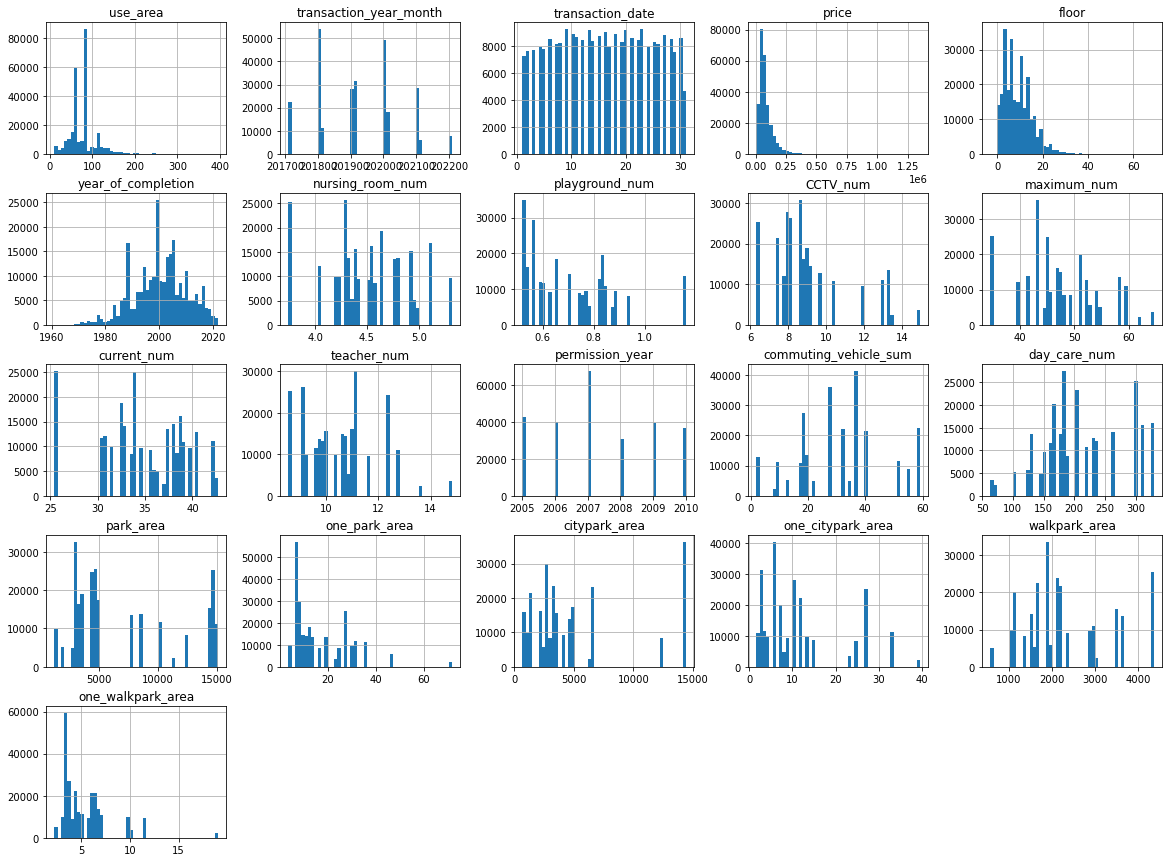

In [8]:
h = train.hist(bins=50, figsize=(20, 15))

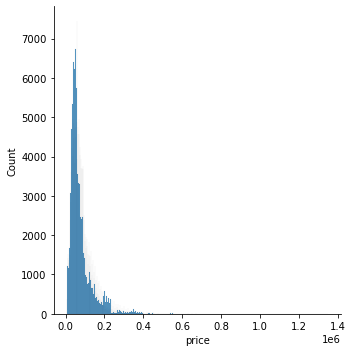

In [9]:
sns.displot(train['price'])  # 타깃값이 skewed 하므로 회귀 모델의 성능을 높이기 위해서 변환이 필요

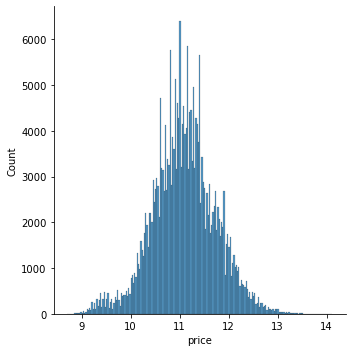

In [10]:
sns.displot(np.log(train['price']))  # log 변환을 해주면 정규분포를 따르므로 로그 변환 진행

# 3. 상관관계

<AxesSubplot:>

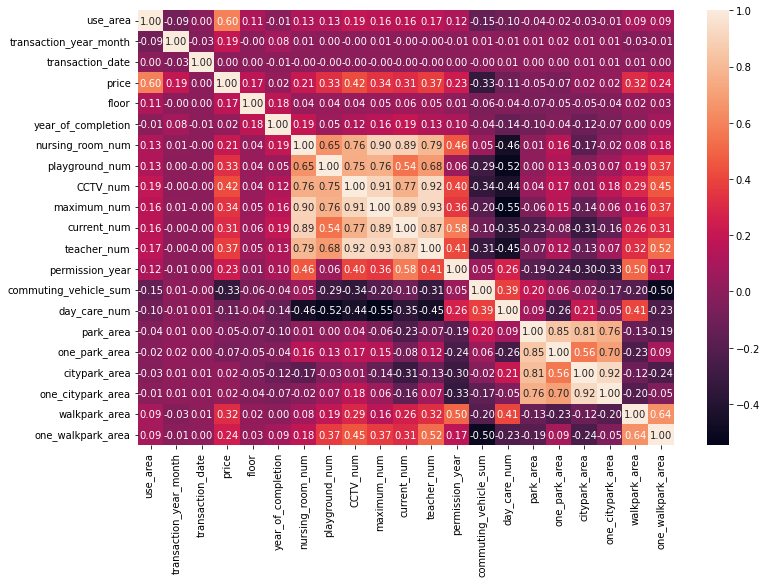

In [11]:
plt.figure(figsize=(12, 8))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f")

In [12]:
train.keys()

Index(['apt_name', 'use_area', 'transaction_year_month', 'transaction_date',
       'price', 'floor', 'year_of_completion', 'gu', 'dong',
       'nursing_room_num', 'playground_num', 'CCTV_num', 'maximum_num',
       'current_num', 'teacher_num', 'permission_year',
       'commuting_vehicle_sum', 'day_care_num', 'park_area', 'one_park_area',
       'citypark_area', 'one_citypark_area', 'walkpark_area',
       'one_walkpark_area'],
      dtype='object')

<AxesSubplot:xlabel='one_walkpark_area', ylabel='price'>

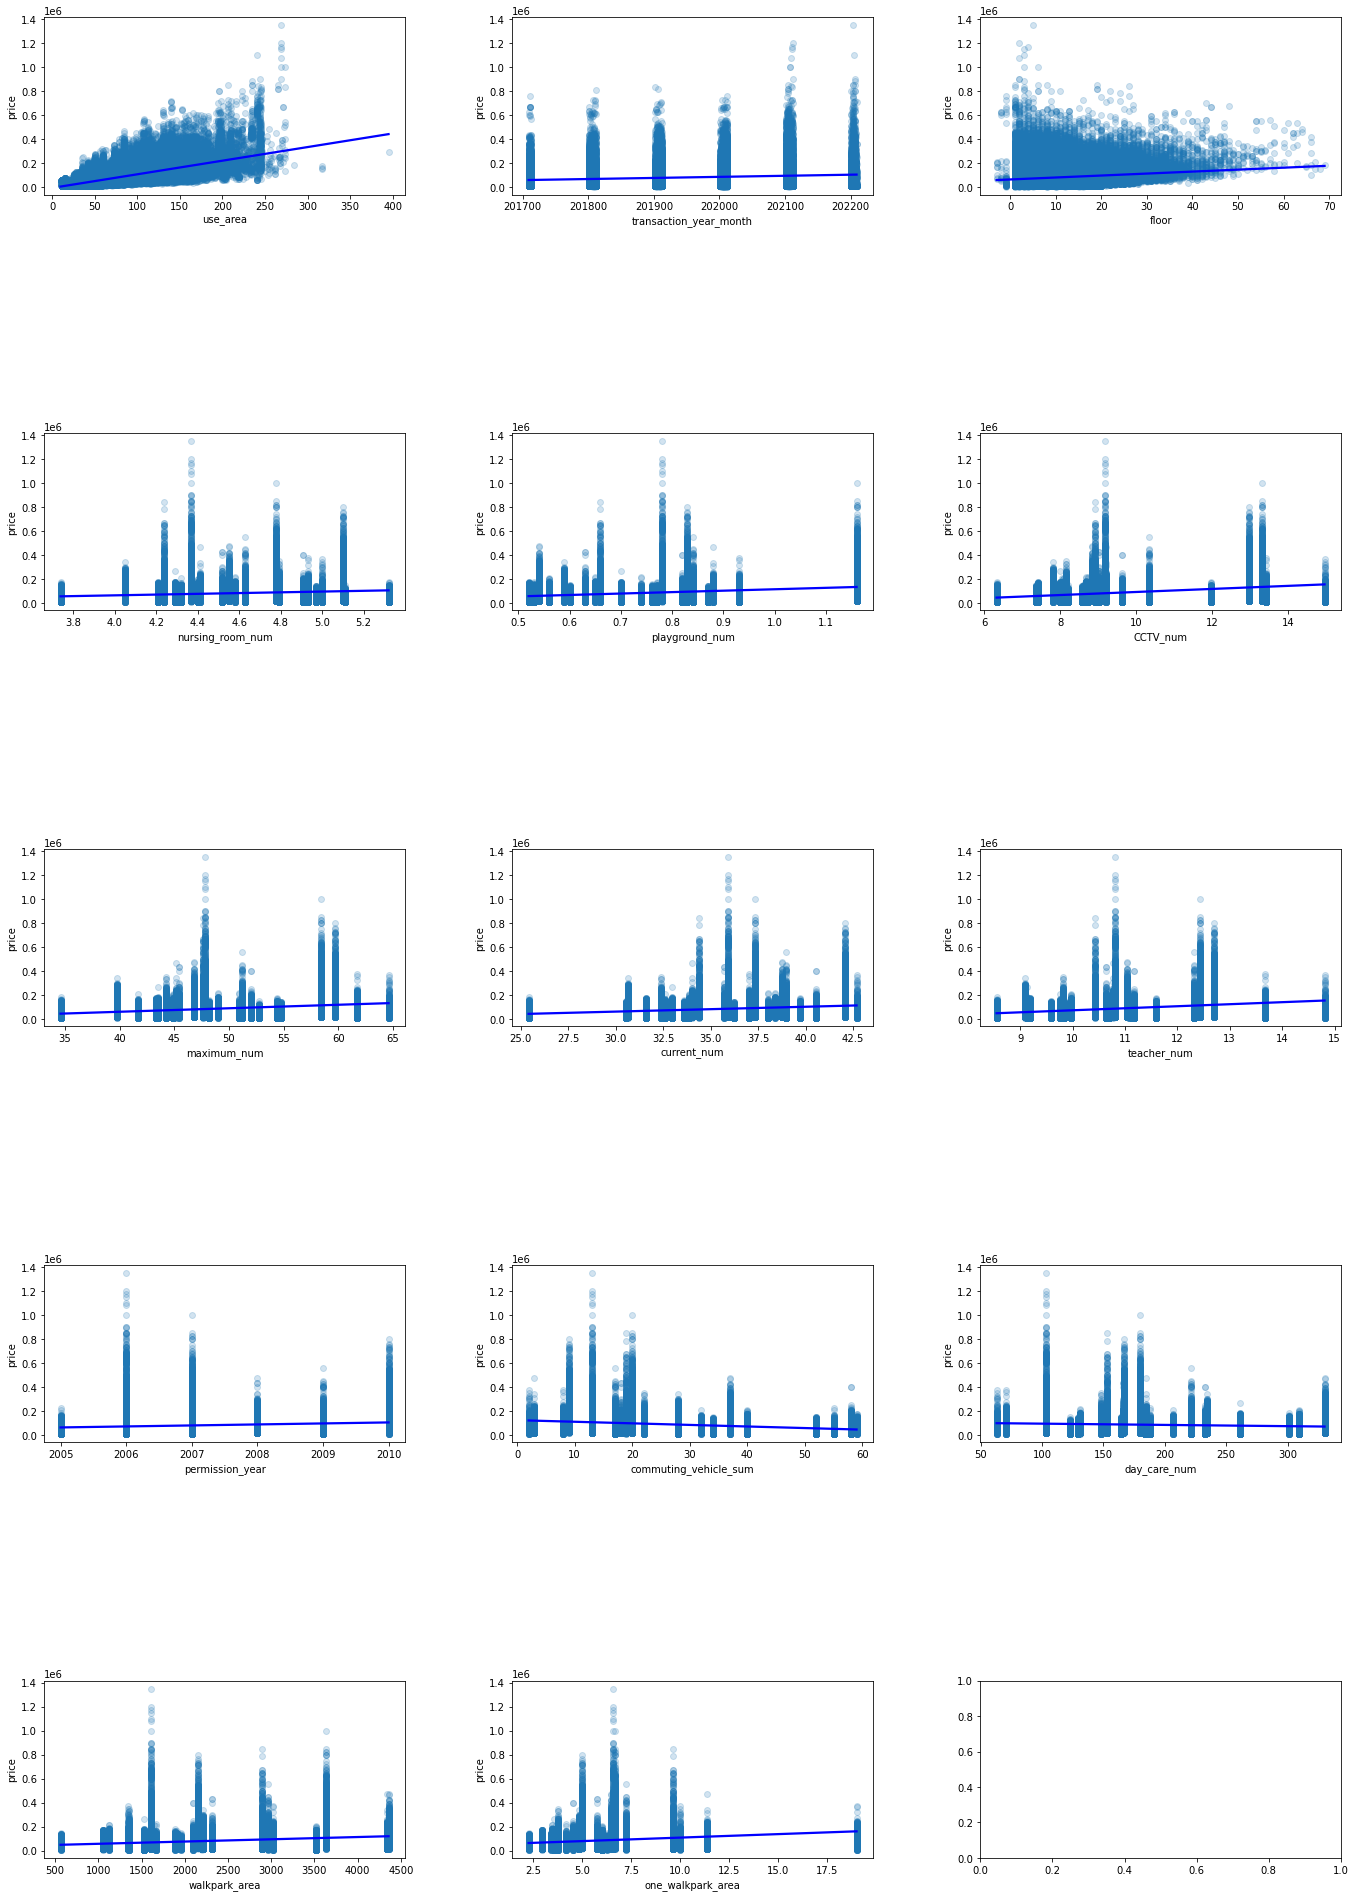

In [13]:
# price와의 상관계수가 어느정도 있는 값들을 뽑아서 그래프 그리기
figure, axes = plt.subplots(nrows = 5, ncols = 3)
plt.tight_layout()
figure.set_size_inches(20, 30)

sns.regplot(data = train, x = 'use_area', y = 'price', ax = axes[0][0],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(data = train, x = 'transaction_year_month', y = 'price', ax = axes[0][1],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(data = train, x = 'floor', y = 'price', ax = axes[0][2],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})

sns.regplot(data = train, x = 'nursing_room_num', y = 'price', ax = axes[1][0],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(data = train, x = 'playground_num', y = 'price', ax = axes[1][1],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(data = train, x = 'CCTV_num', y = 'price', ax = axes[1][2],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})

sns.regplot(data = train, x = 'maximum_num', y = 'price', ax = axes[2][0],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(data = train, x = 'current_num', y = 'price', ax = axes[2][1],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(data = train, x = 'teacher_num', y = 'price', ax = axes[2][2],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})

sns.regplot(data = train, x = 'permission_year', y = 'price', ax = axes[3][0],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(data = train, x = 'commuting_vehicle_sum', y = 'price', ax = axes[3][1],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(data = train, x = 'day_care_num', y = 'price', ax = axes[3][2],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})

sns.regplot(data = train, x = 'walkpark_area', y = 'price', ax = axes[4][0],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})
sns.regplot(data = train, x = 'one_walkpark_area', y = 'price', ax = axes[4][1],
           scatter_kws = {'alpha': 0.2}, line_kws = {'color': 'blue'})

In [14]:
corr_matrix = train.corr()
corr_matrix['price'].sort_values(ascending=False)

price                     1.000000
use_area                  0.595160
CCTV_num                  0.424423
teacher_num               0.374944
maximum_num               0.339786
playground_num            0.328529
walkpark_area             0.315364
current_num               0.305761
one_walkpark_area         0.239233
permission_year           0.230042
nursing_room_num          0.208940
transaction_year_month    0.191856
floor                     0.169619
one_citypark_area         0.023741
year_of_completion        0.023361
citypark_area             0.017898
transaction_date          0.000832
park_area                -0.050086
one_park_area            -0.072148
day_care_num             -0.114949
commuting_vehicle_sum    -0.329761
Name: price, dtype: float64

- 변수 선택

        use_area, CCTV_num, teacher_num, maximum_num, playground_num, walkpark_area, 
        current_num, one_walkpark_area, nursing_room_num, floor
        
- 상관계수가 0.2 이상이거나 중요한 변수라고 판단이 되는 경우를 변수로 선택함

In [15]:
corr = train[['use_area', 'CCTV_num', 'teacher_num', 'maximum_num', 'playground_num', 'walkpark_area', 
              'current_num', 'one_walkpark_area', 'nursing_room_num', 'floor']].corr()

<AxesSubplot:>

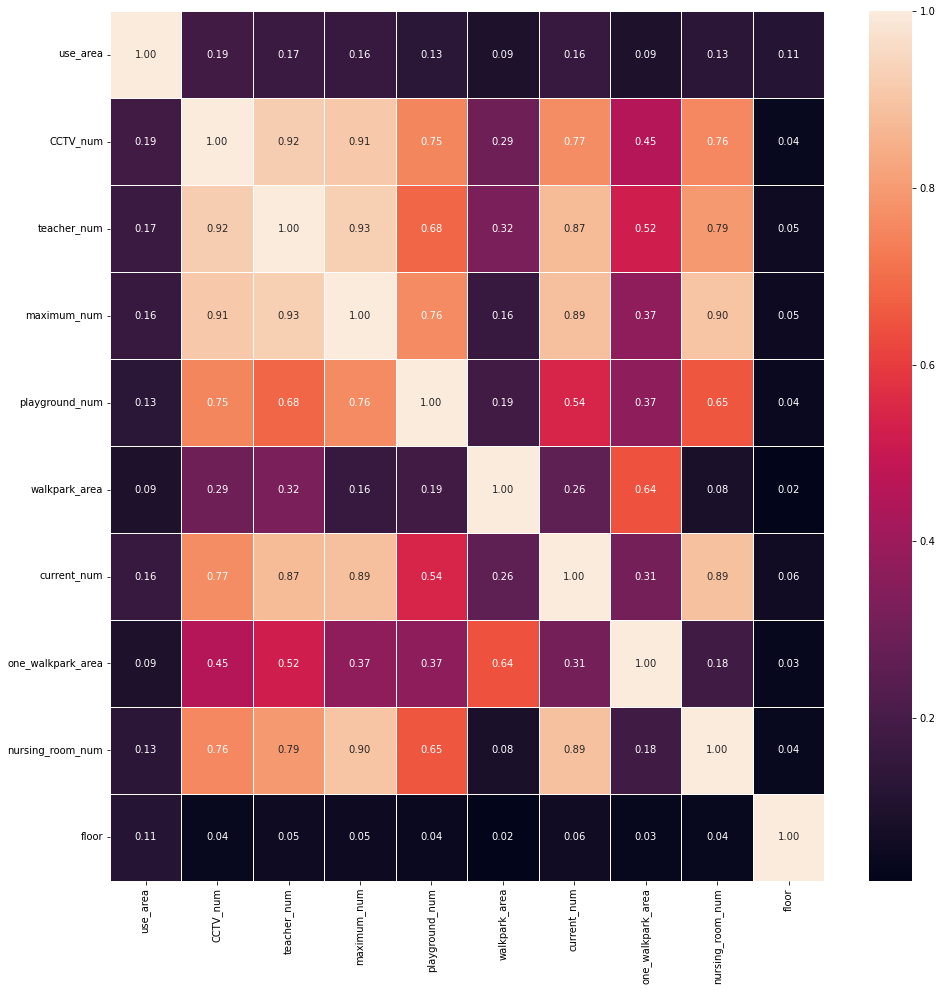

In [16]:
plt.figure(figsize = (16, 16))
sns.heatmap(corr, annot = True, fmt = '.2f', linewidths = 0.5)

- 다중공선성이 높게 나온 값 : cctv수 & 보육실수 / cctv수 & 놀이터수 / 정원 & 보육실수 / 교직원수 & 보육실수 / 정원 & 놀이터수 등
- 이 값들은 당연하게도 어린이 집의 정원이 많으면 보육실수, 놀이터수, ccvtv 수, 교직원 수가 많게 나올 수 밖에 없음

# 4. 데이터 전처리

## (1) test 데이터에서 타깃값 분리

In [5]:
target = test['price'].copy()
test = test.drop('price', axis = 1)

In [18]:
test.shape, target.shape

((64341, 23), (64341,))

## (2) train과 test 데이터 합치기

In [19]:
train.shape

(257362, 24)

In [6]:
all_data = pd.concat([train, test], axis = 0, ignore_index = True)  # 행축으로 연결
all_data.tail()

,apt_name,use_area,transaction_year_month,transaction_date,price,floor,year_of_completion,gu,dong,nursing_room_num,...,teacher_num,permission_year,commuting_vehicle_sum,day_care_num,park_area,one_park_area,citypark_area,one_citypark_area,walkpark_area,one_walkpark_area
321698,우방,114.79,202003,27,NaN,2,1999.0,관악구,신림동,4.63,...,9.83,2005.0,32,185,12431.42,24.38,12424.91,24.37,1910.24,3.75
321699,한마을,149.97,201803,24,NaN,24,1999.0,구로구,개봉동,4.29,...,9.13,2007.0,28,261,3641.45,8.42,3319.70,7.68,1533.35,3.55
321700,정릉우성아파트 101~105동,84.99,202002,22,NaN,8,2000.0,성북구,정릉동,4.32,...,9.76,2007.0,32,207,8507.35,19.03,4586.77,10.26,1640.43,3.67
321701,양평현대6차,59.98,201806,21,NaN,5,2000.0,영등포구,양평동3가,4.63,...,12.32,2009.0,17,221,3009.28,7.39,664.47,1.63,2957.42,7.26
321702,은평뉴타운마고정2단지,84.04,201806,23,NaN,2,2009.0,은평구,진관동,5.32,...,11.59,2010.0,59,207,14365.72,29.68,6597.53,13.63,2200.62,4.55


In [21]:
all_data.shape

(321703, 24)

## (3) 필요없는 특성 제거

In [22]:
all_data.keys()

Index(['apt_name', 'use_area', 'transaction_year_month', 'transaction_date',
       'price', 'floor', 'year_of_completion', 'gu', 'dong',
       'nursing_room_num', 'playground_num', 'CCTV_num', 'maximum_num',
       'current_num', 'teacher_num', 'permission_year',
       'commuting_vehicle_sum', 'day_care_num', 'park_area', 'one_park_area',
       'citypark_area', 'one_citypark_area', 'walkpark_area',
       'one_walkpark_area'],
      dtype='object')

In [7]:
drop_features = ['apt_name', 'gu', 'dong', 'transaction_year_month', 'transaction_date', 'year_of_completion', 'commuting_vehicle_sum', 
                 'day_care_num', 'permission_year', 'park_area', 'one_park_area', 'citypark_area', 'one_citypark_area']
all_data = all_data.drop(drop_features, axis = 1)

In [24]:
all_data.head()

,use_area,price,floor,nursing_room_num,playground_num,CCTV_num,maximum_num,current_num,teacher_num,walkpark_area,one_walkpark_area
0,84.990,68800.0,2,4.52,0.63,9.01,45.47,35.72,10.64,2311.18,5.76
1,58.590,48900.0,12,4.63,0.76,8.63,48.16,33.57,9.83,1910.24,3.75
2,71.060,33000.0,18,4.29,0.70,7.98,43.50,32.98,9.13,1533.35,3.55
3,84.982,130000.0,8,4.52,0.63,9.01,45.47,35.72,10.64,2311.18,5.76
4,84.960,64500.0,13,4.63,0.76,8.63,48.16,33.57,9.83,1910.24,3.75


In [25]:
all_data.keys()

Index(['use_area', 'price', 'floor', 'nursing_room_num', 'playground_num',
       'CCTV_num', 'maximum_num', 'current_num', 'teacher_num',
       'walkpark_area', 'one_walkpark_area'],
      dtype='object')

## (4) 다시 X_train, X_test, y_train 값으로 나누기

In [8]:
X_train = all_data[~pd.isnull(all_data['price'])]
X_test = all_data[pd.isnull(all_data['price'])]

In [27]:
X_train.shape, X_test.shape

((257362, 11), (64341, 11))

In [9]:
# 타깃값(count) 제거, 특성만 가져오기
y_train = X_train['price']
X_train = X_train.drop(['price'], axis = 1)

X_test = X_test.drop(['price'], axis = 1)

In [29]:
print(X_train.shape, y_train.shape, X_test.shape)

(257362, 10) (257362,) (64341, 10)


In [30]:
print(target.shape)

(64341,)


- 독립변수들의 튜닝이 필요한지 알아보기 위해 plot 확인

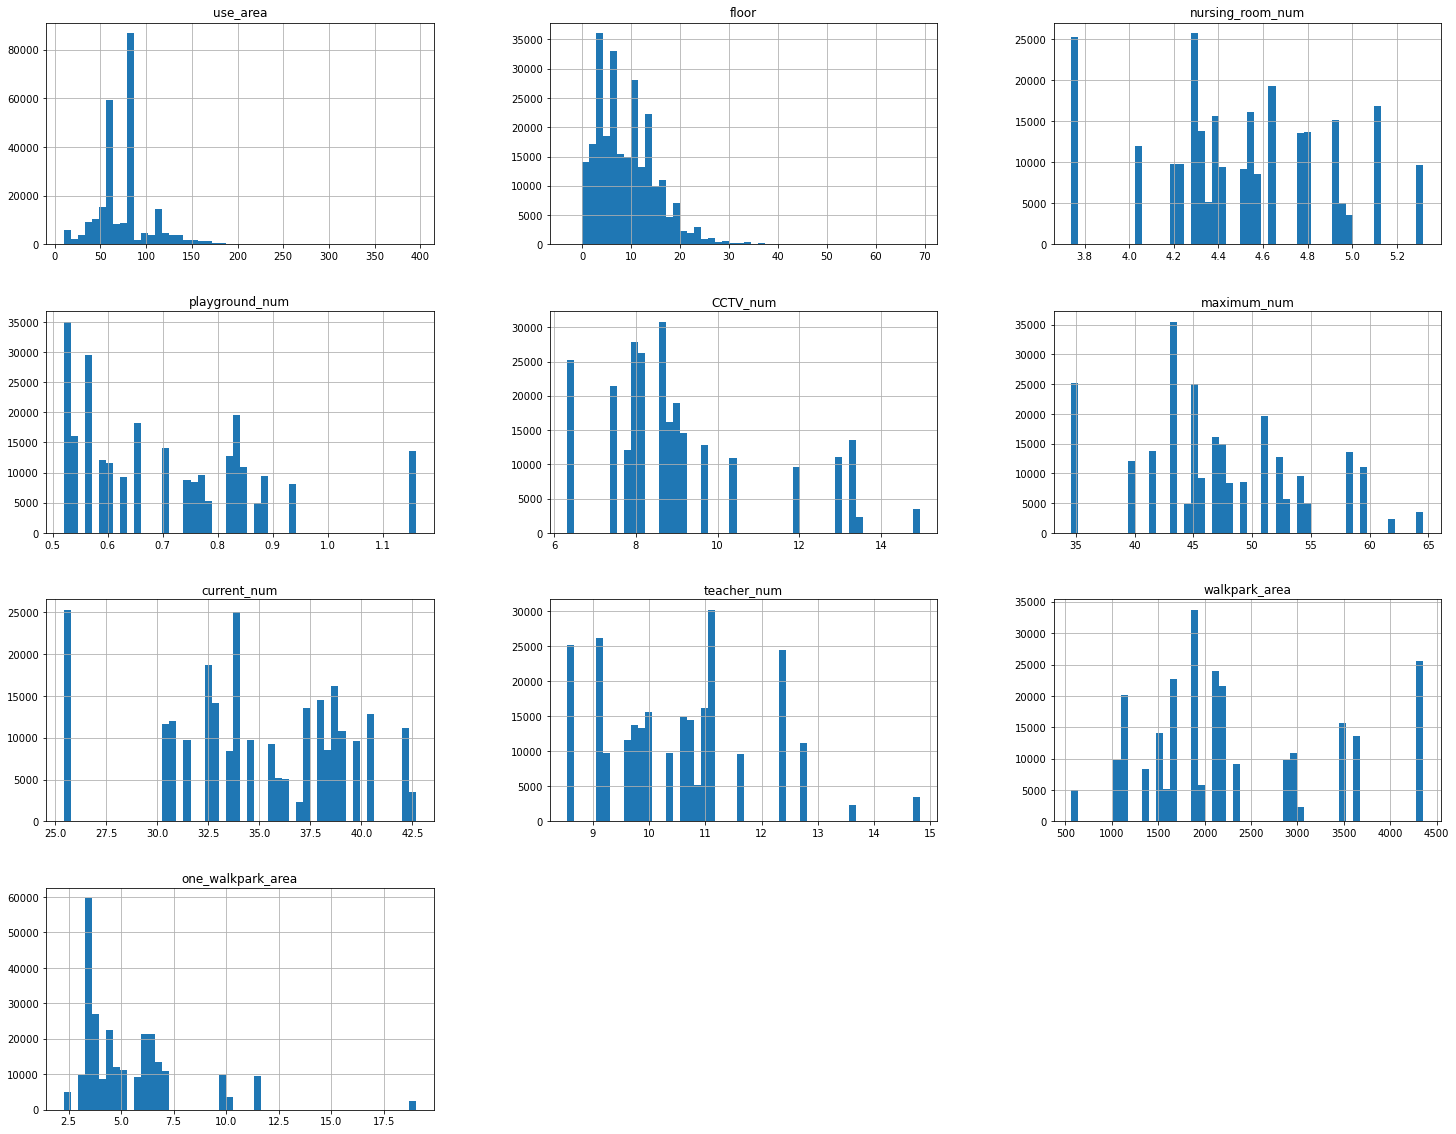

In [22]:
X_hist = X_train.hist(bins=50, figsize=(25,20)) 

- 독립변수들을 log 변환 한다면?

In [11]:
log_X = np.log(X_train)

C:\Users\Playdata\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


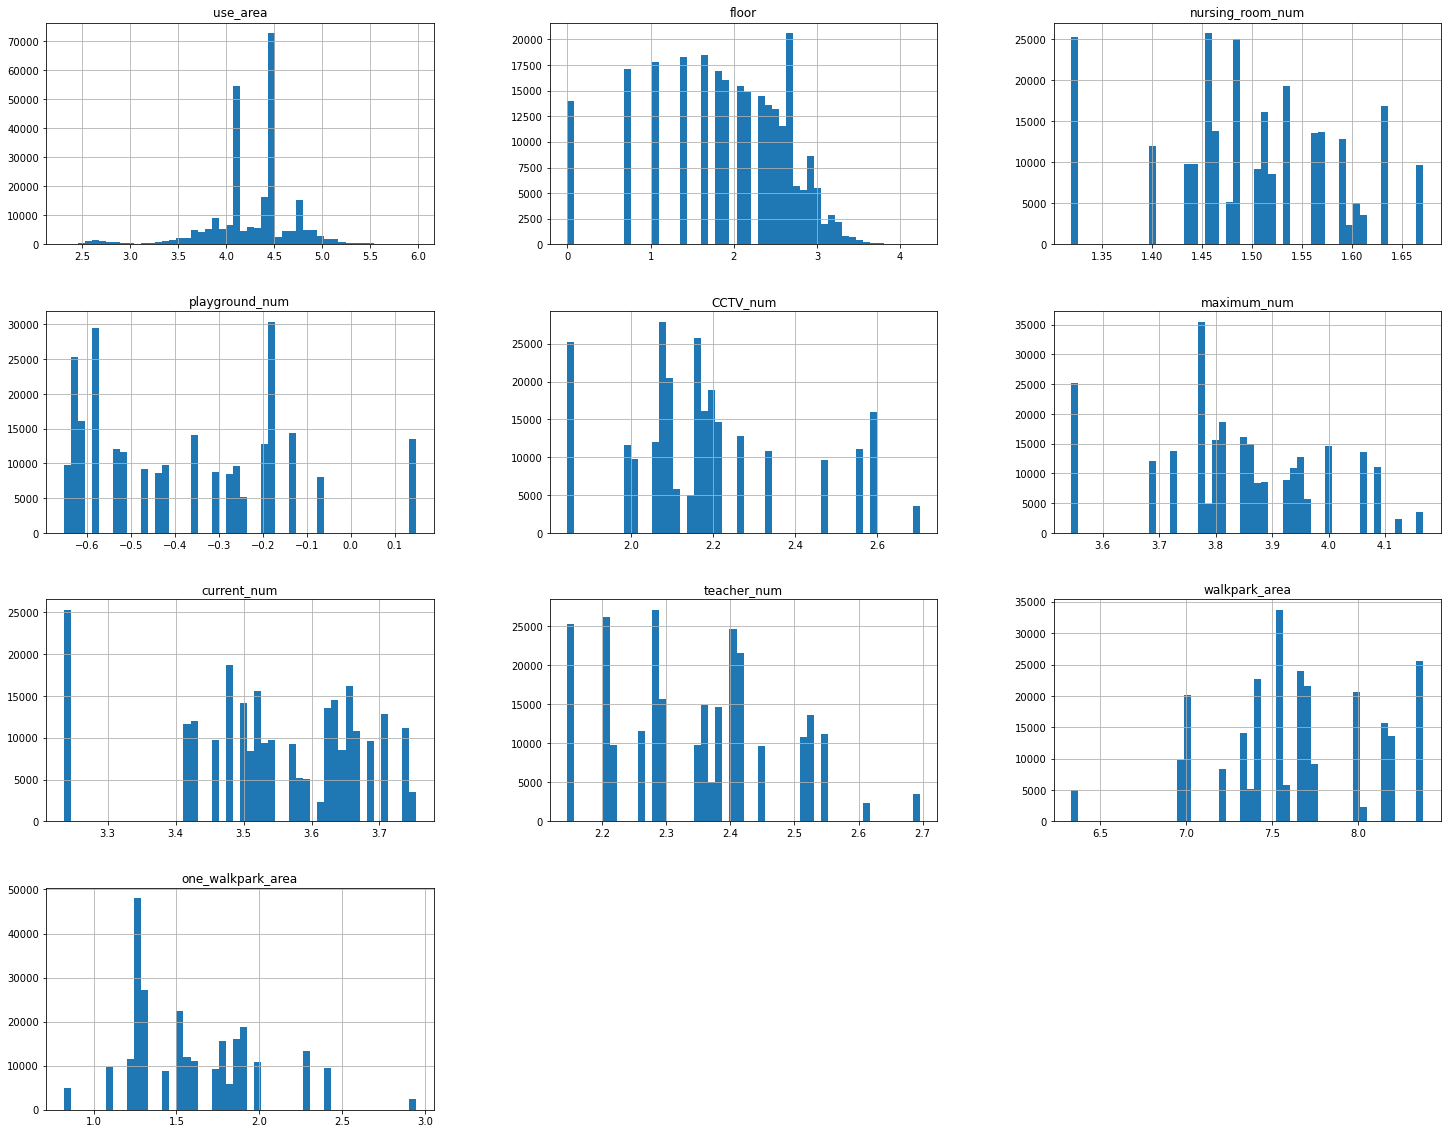

In [21]:
log_hist =log_X.hist(bins=50, figsize=(25,20)) # 로그변환을 한 결과가 원 데이터와 큰 차이를 보이지 않음

- 독립변수들을 제곱 변환 한다면?

In [18]:
X2 = (X_train)**2

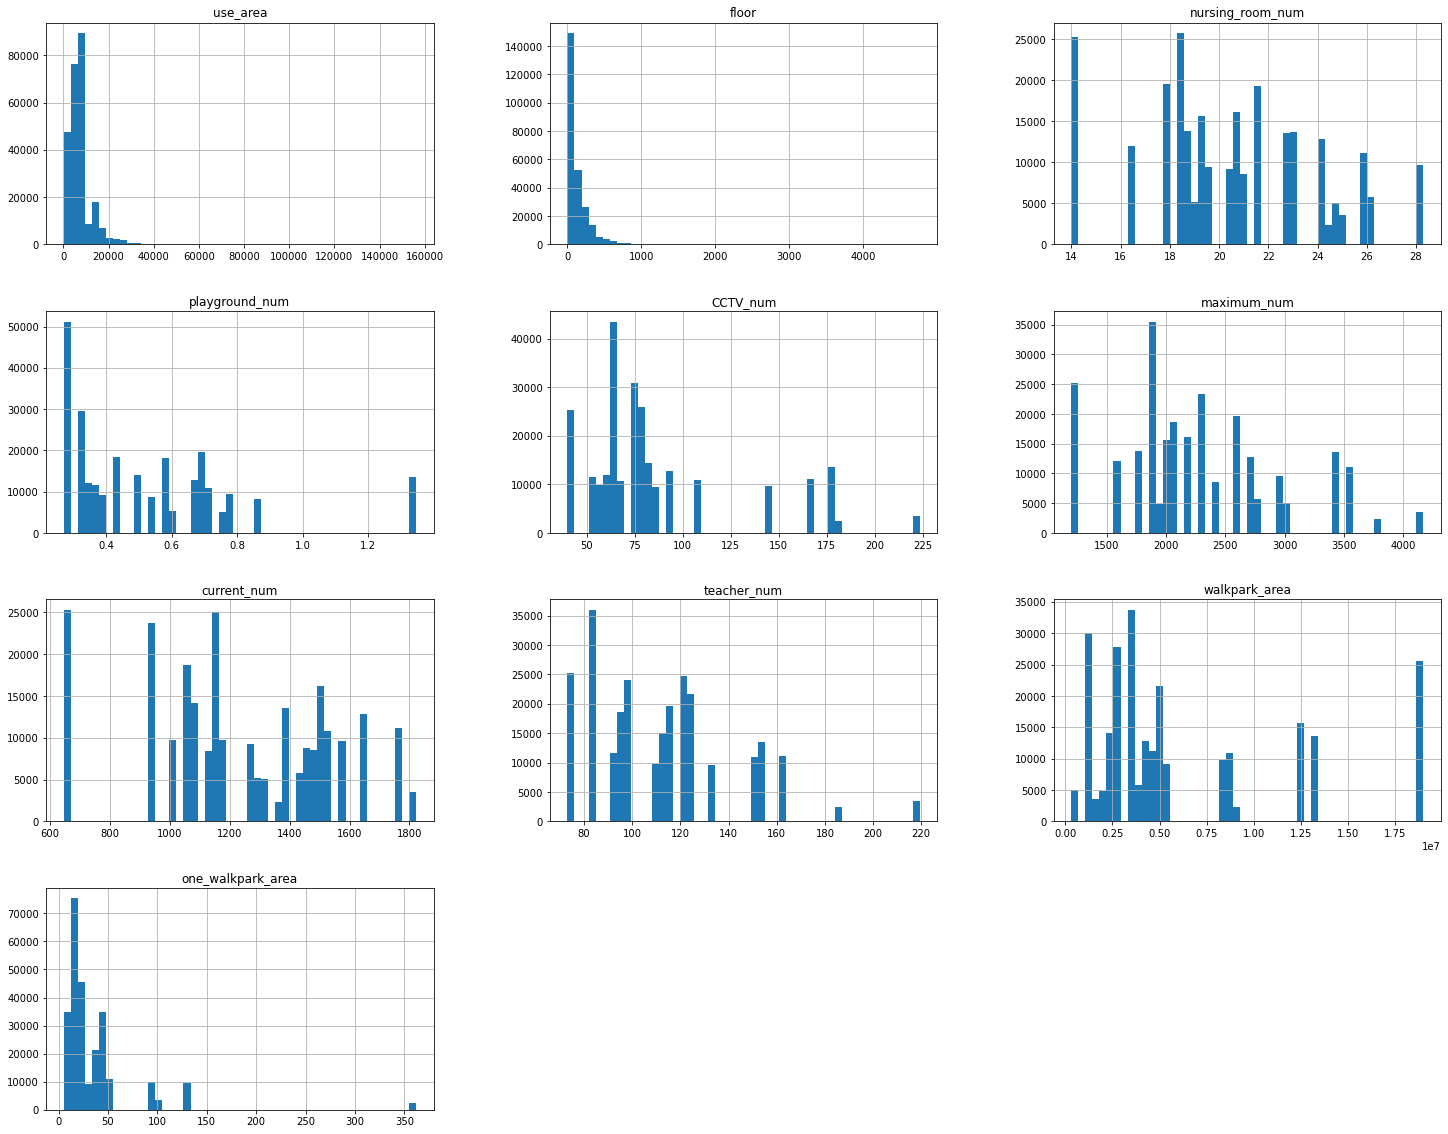

In [20]:
hist_X2 = X2.hist(bins=50, figsize=(25,20)) # 제곱변환을 하면 skewed한 결과가 나타남

- 튜닝을 하지 않은 원데이터(X_train)로 모델링을 진행하기로 함

# 5. 모델 선택과 훈련

## (1) 선형 회귀 모델

- 앞서 나온 결과로 price 값(y값)을 log 변환 시켜줘야함 

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()

In [33]:
log_y = np.log(y_train)
lin_reg.fit(X_train, log_y)

LinearRegression()

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# 교차 검증
scores = cross_val_score(lin_reg, X_train, log_y, scoring = 'neg_mean_squared_error', cv = 5)
-scores.mean()

0.18072040742132023

- 선형 회귀 모델 mse = 0.18072040742132023

## (2) 다항 회귀 모델

#### [1] 정규방정식 이용

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_train.shape, X_train_poly.shape

((257362, 10), (257362, 65))

In [38]:
# 다항회귀 (정규방정식)
lin_reg = LinearRegression()

# 교차검증
scores = cross_val_score(lin_reg, X_train_poly, log_y, scoring = 'neg_mean_squared_error', cv = 5)
-scores.mean()

0.13458429551660994

- 다항 회귀 모델 (정규방정식 이용) mse = 0.13458429551660994

#### [2] 경사하강법 이용

In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [40]:
# 다항회귀 (경사하강법)
# Poly(제곱특성추가) -> SGDRegressor(경사하강법)

sgd_reg = SGDRegressor(penalty = 'None', random_state = 7916)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

# 교차검증
scores = cross_val_score(sgd_reg, X_train_poly, log_y, scoring = 'neg_mean_squared_error', cv = 5)
-scores.mean()

6.590614218899053e+43

- 다항 회귀 모델 (경사하강법 이용) mse = 6.590614218899053e+43

## (3) Ridge

- GridSearchCv 사용해서 파라미터 선택

In [41]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [42]:
ridge = Ridge()

In [43]:
ridge_params = {'alpha': [0.01, 0.05, 0.1, 1, 2, 3, 4, 10]}

gridsearch_ridge = GridSearchCV(ridge, ridge_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1) 

In [44]:
gridsearch_ridge.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.1, 1, 2, 3, 4, 10]},
             scoring='neg_mean_squared_error')

In [45]:
gridsearch_ridge.best_params_

{'alpha': 0.1}

In [46]:
cvres = gridsearch_ridge.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) 

0.1807204074077289 {'alpha': 0.01}
0.1807204073560647 {'alpha': 0.05}
0.1807204072975609 {'alpha': 0.1}
0.18072040739787493 {'alpha': 1}
0.18072041006734557 {'alpha': 2}
0.18072041542155765 {'alpha': 3}
0.18072042345236378 {'alpha': 4}
0.18072052739285716 {'alpha': 10}


- ridge 모델 (alpha = 0.1) mse = 0.1807204072975609

## (4) Lasso

- GridSearchCv 사용해서 파라미터 선택

In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso = Lasso()

In [49]:
lasso_params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1]}

gridsearch_lasso = GridSearchCV(lasso, lasso_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1) 

In [50]:
gridsearch_lasso.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5,
                                   1]},
             scoring='neg_mean_squared_error')

In [51]:
gridsearch_lasso.best_params_

{'alpha': 0.0001}

In [52]:
cvres = gridsearch_lasso.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) 

0.1807230080705341 {'alpha': 0.0001}
0.18097913619268927 {'alpha': 0.001}
0.1883657128835511 {'alpha': 0.01}
0.19260633936299607 {'alpha': 0.05}
0.19732680820082193 {'alpha': 0.1}
0.19868997035712072 {'alpha': 0.2}
0.20666071753316134 {'alpha': 0.5}
0.2127306755308894 {'alpha': 1}


- lasso 모델 (alpha = 0.0001) mse = 0.1807230080705341

## (5) ElasticNet 

- GridSearchCV 사용해서 파라미터 선택

In [53]:
from sklearn.linear_model import ElasticNet

In [54]:
elastic = ElasticNet()

In [55]:
elastic_params = {'alpha': [0.001, 0.01, 0.05 , 0.1, 0.2, 0.5, 1]}

gridsearch_elastic = GridSearchCV(elastic, elastic_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1) 

In [56]:
gridsearch_elastic.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1]},
             scoring='neg_mean_squared_error')

In [57]:
gridsearch_elastic.best_params_

{'alpha': 0.001}

In [58]:
cvres = gridsearch_elastic.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) 

0.18084413448041486 {'alpha': 0.001}
0.184975762863777 {'alpha': 0.01}
0.19124012875794721 {'alpha': 0.05}
0.1928663683512557 {'alpha': 0.1}
0.19733617583935376 {'alpha': 0.2}
0.1997509249054698 {'alpha': 0.5}
0.20670993767099444 {'alpha': 1}


- ElasticNet 모델 (alpha = 0.001) mse = 0.18084413448041486

## (6) 결정트리

- GridSearchCV 사용해서 파라미터 선택

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
tree_reg = DecisionTreeRegressor(random_state=7916)

In [61]:
tree_params = {'max_features' : [2, 4, 6, 8, 10], 'max_depth' : [10, 15, 20]}

In [62]:
gridsearch_tree = GridSearchCV(tree_reg, tree_params, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
gridsearch_tree.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=7916),
             n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': [2, 4, 6, 8, 10]},
             scoring='neg_mean_squared_error')

In [63]:
gridsearch_tree.best_params_

{'max_depth': 15, 'max_features': 10}

In [64]:
cvres = gridsearch_tree.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params)

0.11487183161593748 {'max_depth': 10, 'max_features': 2}
0.10969240983620512 {'max_depth': 10, 'max_features': 4}
0.10615512597111434 {'max_depth': 10, 'max_features': 6}
0.10383601613669557 {'max_depth': 10, 'max_features': 8}
0.10200807469009603 {'max_depth': 10, 'max_features': 10}
0.09692246014852732 {'max_depth': 15, 'max_features': 2}
0.09469887662502886 {'max_depth': 15, 'max_features': 4}
0.09017243267935694 {'max_depth': 15, 'max_features': 6}
0.08645867334017861 {'max_depth': 15, 'max_features': 8}
0.08326235831588577 {'max_depth': 15, 'max_features': 10}
0.09801115503097967 {'max_depth': 20, 'max_features': 2}
0.09592863038340424 {'max_depth': 20, 'max_features': 4}
0.09200732940088843 {'max_depth': 20, 'max_features': 6}
0.08892846373828527 {'max_depth': 20, 'max_features': 8}
0.08502185289684881 {'max_depth': 20, 'max_features': 10}


- 결정트리 모델 (max_depth: 15, max_features: 10) mse = 0.08326235831588577

In [65]:
best_model_tree = gridsearch_tree.best_estimator_
best_model_tree

DecisionTreeRegressor(max_depth=15, max_features=10, random_state=7916)

In [66]:
sorted(zip(best_model_tree.feature_importances_, X_train.columns), reverse = True)

[(0.6146105430435348, 'use_area'),
 (0.1972381418777127, 'CCTV_num'),
 (0.10177582046377515, 'teacher_num'),
 (0.02247488383404033, 'floor'),
 (0.01522945917084668, 'current_num'),
 (0.013198929620090767, 'walkpark_area'),
 (0.012032288496765764, 'playground_num'),
 (0.011600445667100983, 'one_walkpark_area'),
 (0.006063645094064736, 'maximum_num'),
 (0.005775842732068011, 'nursing_room_num')]

## (7) 랜덤포레스트 (여재)

- GridSearchCV 사용해서 파라미터 선택

In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rnd_forest = RandomForestRegressor(random_state=7916)

In [69]:
rf_params = {'n_estimators': [100, 120, 140]}

In [70]:
gridsearch_forest = GridSearchCV(rnd_forest, rf_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)
gridsearch_forest.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=7916),
             n_jobs=-1, param_grid={'n_estimators': [100, 120, 140]},
             scoring='neg_mean_squared_error')

In [71]:
gridsearch_forest.best_params_

{'n_estimators': 140}

In [72]:
cvres = gridsearch_forest.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params)

0.07700034640991632 {'n_estimators': 100}
0.07695854565748539 {'n_estimators': 120}
0.07692742043158787 {'n_estimators': 140}


- 랜덤포레스트 모델 (n_estimators: 140) mse = 0.07692742043158787

In [73]:
best_model_forest = gridsearch_forest.best_estimator_
best_model_forest

RandomForestRegressor(n_estimators=140, random_state=7916)

In [74]:
sorted(zip(best_model_forest.feature_importances_, X_train.columns), reverse = True)

[(0.608575816880071, 'use_area'),
 (0.22275457305917637, 'CCTV_num'),
 (0.05799867691133111, 'floor'),
 (0.019287299360374262, 'current_num'),
 (0.018949525542086267, 'one_walkpark_area'),
 (0.018648489831402156, 'maximum_num'),
 (0.016804220709392224, 'teacher_num'),
 (0.014131990108862031, 'playground_num'),
 (0.011699584298100307, 'walkpark_area'),
 (0.011149823299204163, 'nursing_room_num')]

## (8) Gradient Boosting (Ensemble)

- GridSearchCV 사용해서 파라미터 선택

In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
gbrt_params = {'learning_rate': [0.01, 0.02, 0.03, 0.04],  # 각 트리의 기여도
               'n_estimators': [1000, 1500],
               'subsample': [0.9, 0.5, 0.2],
               'max_depth': [2, 4, 6, 8]}

gbrt = GradientBoostingRegressor()

gridsearch_gbrt = GridSearchCV(gbrt, gbrt_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs = -1)

In [77]:
gridsearch_gbrt.fit(X_train, log_y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [2, 4, 6, 8],
                         'n_estimators': [1000, 1500],
                         'subsample': [0.9, 0.5, 0.2]},
             scoring='neg_mean_squared_error')

In [78]:
gridsearch_gbrt.best_params_

{'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 1500, 'subsample': 0.5}

In [79]:
cvres = gridsearch_gbrt.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(-mean_score, params) 

0.121984042629949 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.9}
0.12194376177135365 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.5}
0.12176253092941089 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.2}
0.1187238087773679 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1500, 'subsample': 0.9}
0.11868629126074166 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1500, 'subsample': 0.5}
0.11848459960294858 {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1500, 'subsample': 0.2}
0.11101961499037971 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.9}
0.11053981528064742 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}
0.11030294154964744 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.2}
0.10792547099311907 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1500, 'subsample': 0.9}
0.1

- Gradient Boosting 모델 ('learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 1500, 'subsample': 0.5) 
  mse = 0.07059033032043774

In [80]:
best_model_gbrt = gridsearch_gbrt.best_estimator_

In [81]:
sorted(zip(best_model_gbrt.feature_importances_, X_train.columns), reverse = True)

[(0.5985527661716553, 'use_area'),
 (0.2090611626501374, 'CCTV_num'),
 (0.03459397859901509, 'floor'),
 (0.03125444789522308, 'maximum_num'),
 (0.026732005392210993, 'one_walkpark_area'),
 (0.026218544756001577, 'teacher_num'),
 (0.022255562453814107, 'playground_num'),
 (0.018892869139067583, 'current_num'),
 (0.017468469362051042, 'walkpark_area'),
 (0.014970193580823757, 'nursing_room_num')]